In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , recall_score ,  precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
# load the data 
flight_data =pd.read_csv('C:\DATA file\Jan_2019_ontime.csv')

flight_data.head(10)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
5,1,2,9E,20363,9E,N927EV,3285,11267,1126702,DAY,...,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,NaN
6,1,2,9E,20363,9E,N915XJ,3286,12448,1244807,JAN,...,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,NaN
7,1,2,9E,20363,9E,N295PQ,3287,12953,1295304,LGA,...,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,NaN
8,1,2,9E,20363,9E,N337PQ,3288,12451,1245102,JAX,...,LGA,1037.0,0.0,1000-1059,1239.0,0.0,0.0,0.0,833.0,NaN
9,1,2,9E,20363,9E,N311PQ,3289,10397,1039707,ATL,...,BMI,1245.0,0.0,1200-1259,1318.0,0.0,0.0,0.0,533.0,NaN


In [3]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

Lets understand what we are looking to predict:

We have dataset of flights from januray 2019 and we want to predict if some flight will delayed or not.
In our dataset, we have 2 columns of delay: 1 column for departure delay [DEP_DEL15], and 1 column for arrivel delay [ARR_DEL15]
We want to predict if someflight will delayed in any time - arrival or departure. So lets create new classifier, named under "delayed" with 2 result:

Delayed - 1 the flight will delay
Delayed - 0 the flight will not delay

In [4]:
flight_data.shape

(583985, 22)

In [5]:
flight_data['DELAYED'] = (flight_data['ARR_DEL15'].astype(bool) | flight_data['DEP_DEL15'].astype(bool)).astype(int)


In [6]:
flight_data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,DELAYED
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,0


In [7]:
flight_data['DELAYED'].value_counts()

0    440724
1    143261
Name: DELAYED, dtype: int64

In [8]:
flight_data['DELAYED'].value_counts(normalize=True)

0    0.754684
1    0.245316
Name: DELAYED, dtype: float64

24% flight delayed [ Arrival+Departure]

We want to remove the canceled and diverted flights, because we are looking for flights that succesfuly departed

# EDA 

Drop the unwanted columns and rows

In [9]:
print("The number of rows before deleted 'Cancelled' column and `DIVERTED` is " + str(flight_data.shape[0]))


flight_data= flight_data.drop(flight_data[flight_data.CANCELLED==1].index)
flight_data= flight_data.drop(flight_data[flight_data.DIVERTED ==1].index)


print("The number of rows after deleted 'Cancelled' column and `DIVERTED` is " + str(flight_data.shape[0]))

The number of rows before deleted 'Cancelled' column and `DIVERTED` is 583985
The number of rows after deleted 'Cancelled' column and `DIVERTED` is 565963


In [10]:
# drop the columns that are not impact the target variable 

flight_data.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM',
                                 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID',
                                 'DEST_AIRPORT_SEQ_ID','Unnamed: 21','OP_CARRIER','ARR_DEL15',
                                 'DEP_DEL15','CANCELLED', 'DIVERTED'], axis='columns', inplace=True)

In [11]:
flight_data.shape

(565963, 10)

We have 56K Rows and 10 columns 

In [12]:
flight_data.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,DELAYED
0,1,2,9E,GNV,ATL,601.0,0600-0659,722.0,300.0,0
1,1,2,9E,MSP,CVG,1359.0,1400-1459,1633.0,596.0,0
2,1,2,9E,DTW,CVG,1215.0,1200-1259,1329.0,229.0,0
3,1,2,9E,TLH,ATL,1521.0,1500-1559,1625.0,223.0,0
4,1,2,9E,ATL,FSM,1847.0,1900-1959,1940.0,579.0,0
5,1,2,9E,DAY,MSP,853.0,0900-0959,953.0,574.0,0
6,1,2,9E,JAN,ATL,1553.0,1500-1559,1832.0,341.0,0
7,1,2,9E,LGA,CVG,1551.0,1500-1559,1824.0,585.0,0
8,1,2,9E,JAX,LGA,1037.0,1000-1059,1239.0,833.0,0
9,1,2,9E,ATL,BMI,1245.0,1200-1259,1318.0,533.0,0


In [13]:
flight_data['DELAYED'].value_counts(normalize=True)

0    0.778715
1    0.221285
Name: DELAYED, dtype: float64

22% flight are delayed [Arrival+departure]

# Missing value Treatment

In [14]:
flight_data.isnull().sum() 

DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
DEP_TIME             0
DEP_TIME_BLK         0
ARR_TIME             0
DISTANCE             0
DELAYED              0
dtype: int64

# Duplicated Values Treatment

In [15]:
dups=flight_data.duplicated()
print('No of duplicated rows',dups.sum())


No of duplicated rows 1


In [16]:
flight_data=flight_data.drop_duplicates()
dups=flight_data.duplicated()
print('No of duplicated rows',dups.sum())


No of duplicated rows 0


In [17]:
flight_data.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_TIME,DISTANCE,DELAYED
count,565962.000000,565962.000000,565962.000000,565962.000000,565962.000000,565962.000000
mean,15.782169,3.838164,1331.831289,1484.412637,802.396184,0.221285
std,8.960358,1.919587,495.389969,522.973564,592.326242,0.415112
min,1.000000,1.000000,1.000000,1.000000,31.000000,0.000000
25%,8.000000,2.000000,921.000000,1104.000000,366.000000,0.000000
50%,16.000000,4.000000,1328.000000,1517.000000,642.000000,0.000000
75%,24.000000,5.000000,1738.000000,1919.000000,1045.000000,0.000000
max,31.000000,7.000000,2400.000000,2400.000000,4983.000000,1.000000


# Uni_variate analysis 

Text(0.5, 1.0, 'DISTANCE')

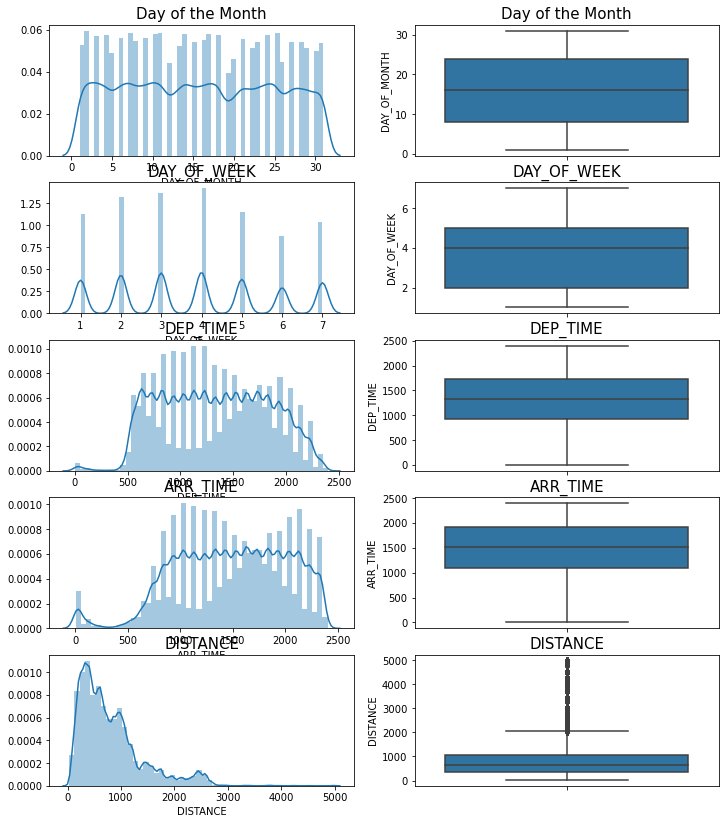

In [18]:
fig,axes= plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12,14)

a= sns.distplot(flight_data['DAY_OF_MONTH'], ax=axes[0][0])
a.set_title('Day of the Month',fontsize=15)

a=sns.boxplot(flight_data['DAY_OF_MONTH'],orient='v',ax=axes[0][1])
a.set_title('Day of the Month',fontsize=15)


a= sns.distplot(flight_data['DAY_OF_WEEK'], ax=axes[1][0])
a.set_title('DAY_OF_WEEK',fontsize=15)

a=sns.boxplot(flight_data['DAY_OF_WEEK'],orient='v',ax=axes[1][1])
a.set_title('DAY_OF_WEEK',fontsize=15)

a= sns.distplot(flight_data['DEP_TIME'], ax=axes[2][0])
a.set_title('DEP_TIME',fontsize=15)

a=sns.boxplot(flight_data['DEP_TIME'],orient='v',ax=axes[2][1])
a.set_title('DEP_TIME',fontsize=15)

a= sns.distplot(flight_data['ARR_TIME'], ax=axes[3][0])
a.set_title('ARR_TIME',fontsize=15)

a=sns.boxplot(flight_data['ARR_TIME'],orient='v',ax=axes[3][1])
a.set_title('ARR_TIME',fontsize=15)

a= sns.distplot(flight_data['DISTANCE'], ax=axes[4][0])
a.set_title('DISTANCE',fontsize=15)

a=sns.boxplot(flight_data['DISTANCE'],orient='v',ax=axes[4][1])
a.set_title('DISTANCE',fontsize=15)

In [19]:
cat_columns= flight_data.select_dtypes(include=['object'])
cat_columns.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_BLK
0,9E,GNV,ATL,0600-0659
1,9E,MSP,CVG,1400-1459
2,9E,DTW,CVG,1200-1259
3,9E,TLH,ATL,1500-1559
4,9E,ATL,FSM,1900-1959


In [20]:
flight_data.OP_UNIQUE_CARRIER.value_counts()

WN    107235
AA     75354
DL     73403
OO     61769
UA     46126
YX     24569
MQ     23710
B6     23395
OH     22369
AS     20204
9E     19821
YV     17829
NK     15009
EV     12200
F9      9490
HA      6785
G4      6694
Name: OP_UNIQUE_CARRIER, dtype: int64

In [21]:
flight_data.ORIGIN.value_counts()

ATL    30783
ORD    23336
DFW    22705
CLT    18772
DEN    18220
       ...  
OGS       10
HGR       10
OWB        9
ADK        9
OGD        8
Name: ORIGIN, Length: 346, dtype: int64

In [22]:
flight_data.DEST.value_counts()

ATL    30797
ORD    23262
DFW    22723
CLT    18781
DEN    18232
       ...  
HGR       10
OGS       10
OWB        9
ADK        9
OGD        8
Name: DEST, Length: 346, dtype: int64

In [23]:
flight_data.DEP_TIME_BLK.value_counts()

0600-0659    40616
0800-0859    37868
0700-0759    37268
1700-1759    36098
1200-1259    35854
1100-1159    35771
1500-1559    34944
1400-1459    34786
1000-1059    34630
1600-1659    34255
0900-0959    33492
1800-1859    33376
1300-1359    32510
1900-1959    30761
2000-2059    25181
2100-2159    17133
0001-0559    15301
2200-2259    12596
2300-2359     3522
Name: DEP_TIME_BLK, dtype: int64

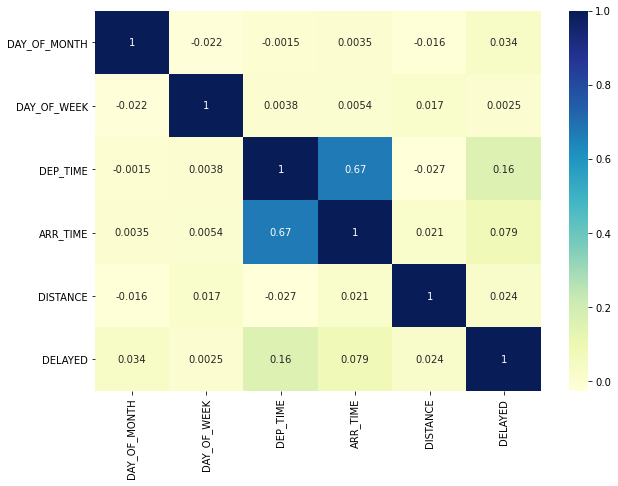

In [24]:
plt.figure(figsize=(10,7))
corr_data= flight_data[['DAY_OF_MONTH','DAY_OF_WEEK','DEP_TIME','ARR_TIME','DISTANCE','DELAYED']].corr()
sns.heatmap(corr_data , annot= True,cmap="YlGnBu");

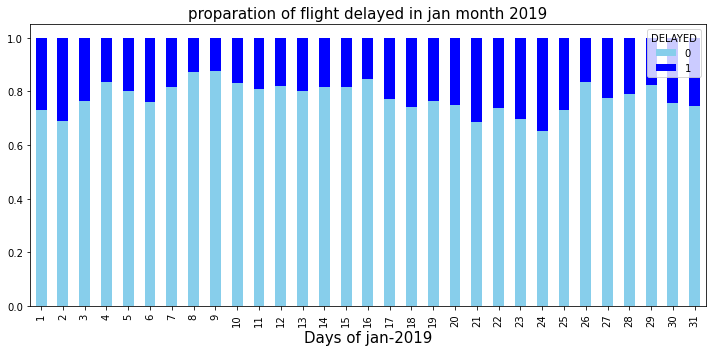

In [25]:
# flight delayed in jan 2019 

data=pd.crosstab(flight_data['DAY_OF_MONTH'],flight_data['DELAYED'])
data.div(data.sum(1).astype('float'),axis=0).plot(kind='bar',stacked='True',figsize=(10,5),color=['skyblue','blue'])
plt.title('proparation of flight delayed in jan month 2019',fontsize=15)
plt.xlabel('Days of jan-2019',fontsize=15);
plt.tight_layout();

on average 10% flight are delyed in jan 2019 

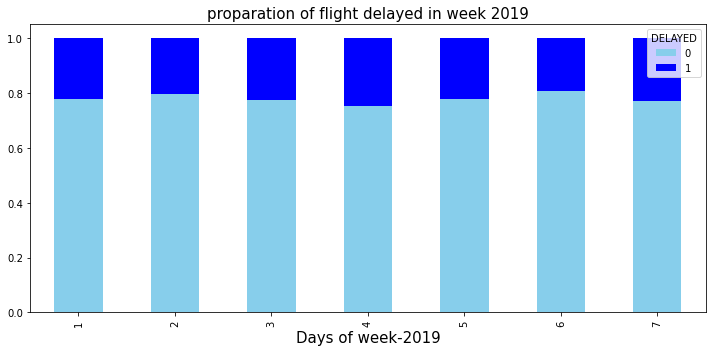

In [26]:
data=pd.crosstab(flight_data['DAY_OF_WEEK'],flight_data['DELAYED'])
data.div(data.sum(1).astype('float'),axis=0).plot(kind='bar',stacked='True',figsize=(10,5),color=['skyblue','blue'])
plt.title('proparation of flight delayed in week 2019',fontsize=15)
plt.xlabel('Days of week-2019',fontsize=15);
plt.tight_layout();

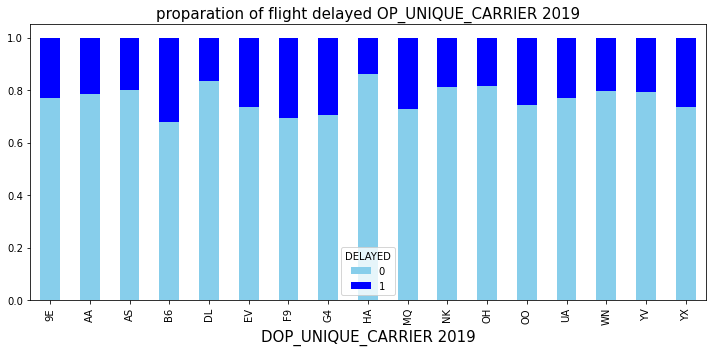

In [27]:
data=pd.crosstab(flight_data['OP_UNIQUE_CARRIER'],flight_data['DELAYED'])
data.div(data.sum(1).astype('float'),axis=0).plot(kind='bar',stacked='True',figsize=(10,5),color=['skyblue','blue'])
plt.title('proparation of flight delayed OP_UNIQUE_CARRIER 2019',fontsize=15)
plt.xlabel('DOP_UNIQUE_CARRIER 2019',fontsize=15);
plt.tight_layout();

In [28]:
data=pd.crosstab(flight_data['OP_UNIQUE_CARRIER'],flight_data['DELAYED'],normalize='index')
data

DELAYED,0,1
OP_UNIQUE_CARRIER,,
9E,0.770395,0.229605
AA,0.783966,0.216034
AS,0.800535,0.199465
B6,0.679718,0.320282
DL,0.835048,0.164952
EV,0.734344,0.265656
F9,0.695469,0.304531
G4,0.706454,0.293546
HA,0.860575,0.139425


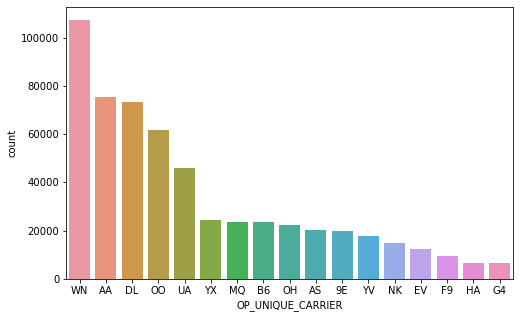

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='OP_UNIQUE_CARRIER',data=flight_data,order=flight_data['OP_UNIQUE_CARRIER'].value_counts().index);

In [30]:
for feature in cat_columns.columns:
    if  cat_columns[feature].dtypes== 'object':
        cat_columns[feature]=pd.Categorical(cat_columns[feature]).codes

<ipython-input-30-e197b6e7261b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_columns[feature]=pd.Categorical(cat_columns[feature]).codes


In [31]:
cat_columns.head()

,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_BLK
0,0,128,19,1
1,0,225,80,9
2,0,95,80,7
3,0,325,19,10
4,0,19,120,14


In [32]:
flight_data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,DELAYED
0,1,2,9E,GNV,ATL,601.0,0600-0659,722.0,300.0,0
1,1,2,9E,MSP,CVG,1359.0,1400-1459,1633.0,596.0,0
2,1,2,9E,DTW,CVG,1215.0,1200-1259,1329.0,229.0,0
3,1,2,9E,TLH,ATL,1521.0,1500-1559,1625.0,223.0,0
4,1,2,9E,ATL,FSM,1847.0,1900-1959,1940.0,579.0,0


In [33]:
flight_data=flight_data.drop(['OP_UNIQUE_CARRIER','ORIGIN','DEST','DEP_TIME_BLK'],axis=1)
flight_data1 =pd.concat([flight_data,cat_columns],axis=1)

In [34]:
flight_data1.shape

(565962, 10)

In [35]:
# Split the training and testing data set 

In [36]:
X=flight_data1.drop(['DELAYED'],axis=1)
y=flight_data1.pop('DELAYED')

In [37]:
from sklearn.model_selection import train_test_split 

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3 ,random_state=1)

In [39]:
print('X_train shape:' ,X_train.shape)
print('X_test shape:' ,X_test.shape)
print('y_train shape:' ,y_train.shape)
print('y_test shape:' ,y_test.shape)


X_train shape: (396173, 9)
X_test shape: (169789, 9)
y_train shape: (396173,)
y_test shape: (169789,)


# Model: Ensamble randomforest Classifier 

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
import time


In [42]:
start=time.time()
rfc1 = RandomForestClassifier(n_estimators=100,max_features=6,random_state=1)
rfc1
end=time.time()
print("Time to run the model:",(end-start),"second")


Time to run the model: 0.0 second


In [43]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_features=6, random_state=1)

In [44]:
 ytrain_predict=rfc1.predict(X_train)
 

In [45]:
ytest_predict=rfc1.predict(X_test)

In [46]:
print(rfc1.score(X_train,y_train))

0.9999798068015741


In [47]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

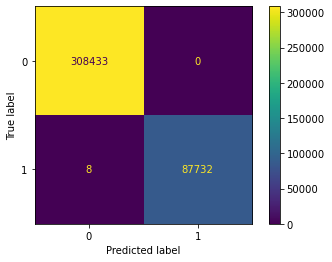

In [48]:
# lets check how well our model is predicting 1's and 0's
plot_confusion_matrix(rfc1,X_train,y_train);


In [49]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    308433
           1       1.00      1.00      1.00     87740

    accuracy                           1.00    396173
   macro avg       1.00      1.00      1.00    396173
weighted avg       1.00      1.00      1.00    396173



# ROC_AUC curve 

In [50]:
from sklearn.metrics import roc_curve,roc_auc_score 

Text(0.5, 1.0, 'ROC')

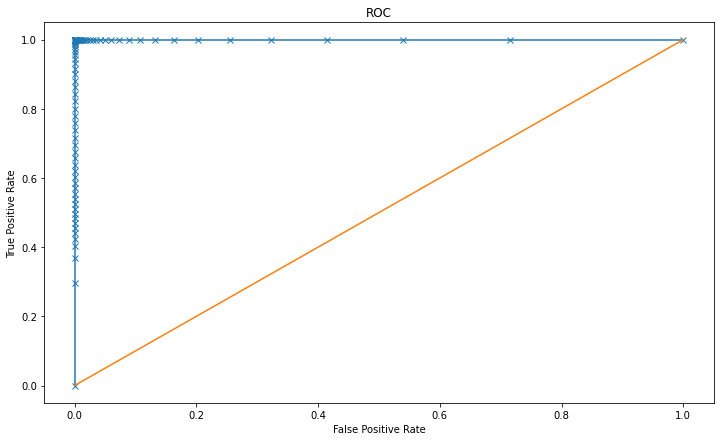

In [51]:
rf_fpr,rf_tpr,_=roc_curve(y_train,rfc1.predict_proba(X_train)[:,1]) # keep positive probability only 
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr,marker='x',label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

# Test Accuracy 

In [52]:
print(rfc1.score(X_test,y_test))

0.9086866640359506


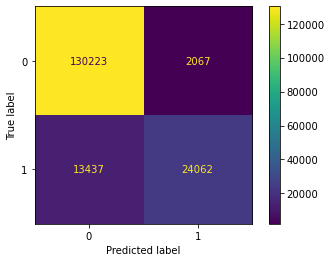

In [53]:
plot_confusion_matrix(rfc1,X_test,y_test);

In [54]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94    132290
           1       0.92      0.64      0.76     37499

    accuracy                           0.91    169789
   macro avg       0.91      0.81      0.85    169789
weighted avg       0.91      0.91      0.90    169789



Model is performing well in train data set but poor performance while test data set its a overfitting problem 

In [55]:
# TPR & FPR at 50% thresold

print("TPR-", 24062/(24062+13437))
print("FPR:", 2067/(2067+130223))

TPR- 0.6416704445451878
FPR: 0.015624763776551516


Text(0.5, 1.0, 'ROC')

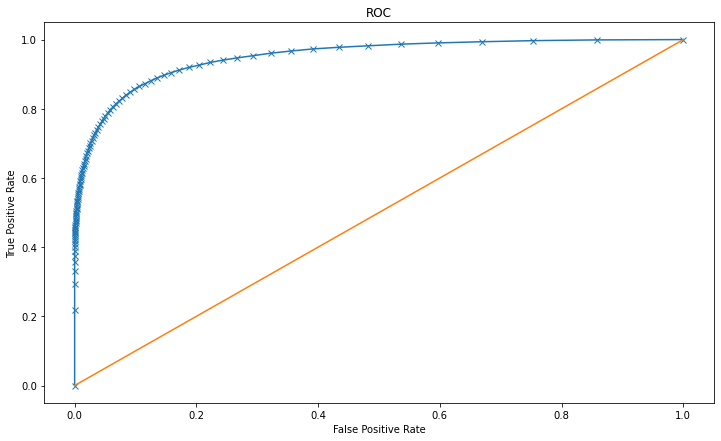

In [56]:
rf_fpr,rf_tpr,_=roc_curve(y_test,rfc1.predict_proba(X_test)[:,1]) # keep positive probability only 
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr,marker='x',label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

lets try to tuneing the model for better prediction and to overcome the overfitting issue 

# Optimal Probability cut_off 

In [57]:
optimal_cutoff=sorted(list(zip(np.abs(rf_tpr - rf_fpr),_)),key=lambda i:i[0],reverse=True)[0][1]
print("optimal_probability_cutoff-",optimal_cutoff)

optimal_probability_cutoff- 0.23


# Train_data 

In [58]:
roc_opt_pred_train=[1 if i>= optimal_cutoff else 0 for i in rfc1.predict_proba(X_train)[:,-1]]
roc_opt_pred_train[:5]

[0, 0, 0, 1, 0]

In [59]:
y_predict_opt_cutoff_train=pd.Series(roc_opt_pred_train,name='predicted')

# confusion_mateix- post optimal cutoff

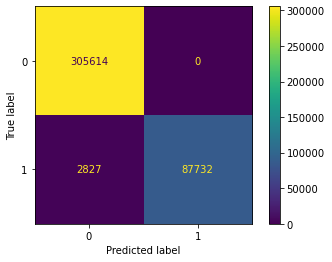

In [60]:
plot_confusion_matrix(rfc1,X_train,y_predict_opt_cutoff_train);

In [61]:
print(classification_report(y_train,y_predict_opt_cutoff_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    308433
           1       0.97      1.00      0.98     87740

    accuracy                           0.99    396173
   macro avg       0.98      1.00      0.99    396173
weighted avg       0.99      0.99      0.99    396173



In [62]:
# TPR & FPR at 23% thresold
print("TPR-", 87732/(0+87732))
print("FPR:", 2827/(2827+305614))

TPR- 1.0
FPR: 0.009165448173232482


In [63]:
roc_opt_pred_test=[1 if i>= optimal_cutoff else 0 for i in rfc1.predict_proba(X_test)[:,-1]]
roc_opt_pred_test[:5]

[0, 1, 0, 1, 0]

# Test_data

In [64]:
y_predict_opt_cutoff_test=pd.Series(roc_opt_pred_test,name='predicted')

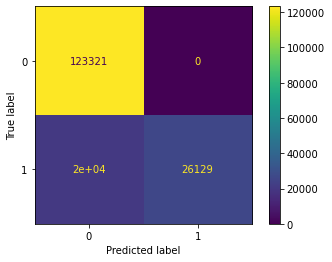

In [65]:
plot_confusion_matrix(rfc1,X_test,y_predict_opt_cutoff_test);

In [66]:
print(classification_report(y_test,y_predict_opt_cutoff_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93    132290
           1       0.70      0.86      0.77     37499

    accuracy                           0.89    169789
   macro avg       0.83      0.88      0.85    169789
weighted avg       0.90      0.89      0.89    169789



# Feature_importance 

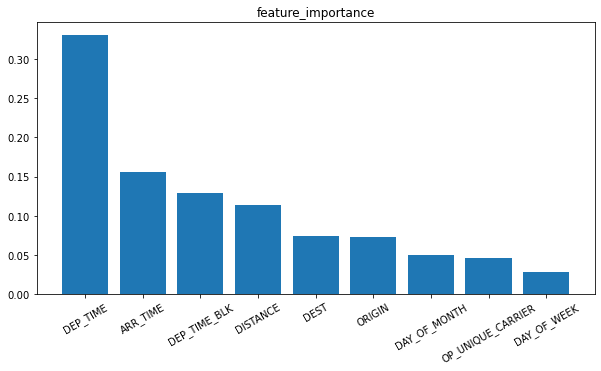

In [67]:
importances=rfc1.feature_importances_
features=list(flight_data1.columns)

indices= np.argsort(importances)[::-1]
names=[features[i] for i in indices]
plt.figure(figsize=(10,5))
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]),names,rotation=30,fontsize=10)
plt.title('feature_importance')
plt.show()
           

# Tuneing the model 

# RandomizedSearchCV 

In [68]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [69]:
n_estimators=[100,200,300]
max_depth=[3,4,5]
min_samples_split=[2,5,10]

In [70]:
param_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split
            
           }
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10]}


In [71]:
start=time.time()

rfc_randomized =RandomizedSearchCV(estimator=rfc1,param_distributions=param_grid,cv=5,verbose=True,n_jobs=4)

rfc_randomized.fit(X_train,y_train)
end =time.time()

print("total time taken:",end-start,"second")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 44.4min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 53.7min finished


total time taken: 3298.128175020218 second


In [72]:
rfc_randomized.best_estimator_

RandomForestClassifier(max_depth=5, max_features=6, min_samples_split=10,
                       random_state=1)

# Train_Accuracy 

In [73]:
rfc_randomized.score(X_train,y_train)

0.8035580415626506

In [74]:
rfc_randomized.score(X_test,y_test)

0.8041156965410009

In [75]:
best_grid=rfc_randomized.best_estimator_

In [76]:
ytrain_predict_rscv=best_grid.predict(X_train)
ytest_predict_rscv=best_grid.predict(X_test)

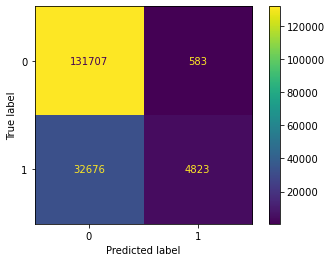

In [77]:
plot_confusion_matrix(best_grid,X_test,y_test)

In [78]:
print(classification_report(y_train,ytrain_predict_rscv))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89    308433
           1       0.89      0.13      0.23     87740

    accuracy                           0.80    396173
   macro avg       0.85      0.56      0.56    396173
weighted avg       0.82      0.80      0.74    396173



performance After Tuning of the model is worst as compare the base model 

# Oversampling and undersampling technique 

In [79]:
import imblearn

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
# define oversampling 
oversample=RandomOverSampler(sampling_strategy='minority')

In [82]:
X_train_over,y_train_over=oversample.fit_resample(X_train,y_train)

In [83]:
print('X_train data shape',X_train.shape)
print('X_train overdata shape',X_train_over.shape)

print('y_train data shape',y_train.shape)
print('y_train over data shape',y_train_over.shape)

X_train data shape (396173, 9)
X_train overdata shape (616866, 9)
y_train data shape (396173,)
y_train over data shape (616866,)


In [84]:
print('X_test data shape',X_test.shape)
print('y_test data shape',y_test.shape)

X_test data shape (169789, 9)
y_test data shape (169789,)


In [85]:
from collections import Counter

In [86]:
# summerize class distribution 
print(Counter(y_train_over))
print(Counter(y_train))

Counter({0: 308433, 1: 308433})
Counter({0: 308433, 1: 87740})


In [87]:
rfc1_over=RandomForestClassifier(n_estimators=100,max_features=6,random_state=1)
rfc1_over

RandomForestClassifier(max_features=6, random_state=1)

In [88]:
start=time.time()

rfc1_over.fit(X_train_over,y_train_over)

end=time.time()

print('Total time :', end-start, 'second')

Total time : 480.03927540779114 second


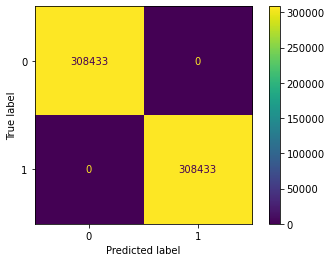

In [89]:
plot_confusion_matrix(rfc1_over,X_train_over,y_train_over);

# Test  Accuracy  over ovesampling

In [90]:
rfc1_over.score(X_test,y_test)

0.9129272214336618

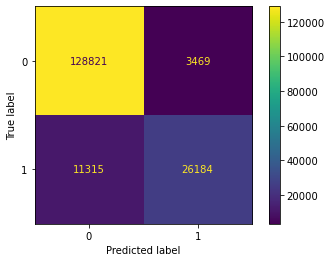

In [91]:
plot_confusion_matrix(rfc1_over,X_test,y_test)

In [92]:
ytest_predict_over=rfc1_over.predict(X_test)

In [93]:
print(classification_report(y_test,ytest_predict_over))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    132290
           1       0.88      0.70      0.78     37499

    accuracy                           0.91    169789
   macro avg       0.90      0.84      0.86    169789
weighted avg       0.91      0.91      0.91    169789



# Random Undersampling

In [94]:
from imblearn.under_sampling import RandomUnderSampler

In [95]:
undersample=RandomUnderSampler(sampling_strategy=0.5)

In [96]:
X_train_under,y_train_under=undersample.fit_resample(X_train,y_train)

In [97]:
print('X_train data shape',X_train.shape)
print('X_train overdata shape',X_train_under.shape)

print('y_train data shape',y_train.shape)
print('y_train over data shape',y_train_under.shape)

X_train data shape (396173, 9)
X_train overdata shape (263220, 9)
y_train data shape (396173,)
y_train over data shape (263220,)


In [98]:
# summerize class distribution 
print(Counter(y_train_under))
print(Counter(y_train))

Counter({0: 175480, 1: 87740})
Counter({0: 308433, 1: 87740})


In [99]:
rfc1_under=RandomForestClassifier(n_estimators=100,max_features=6,random_state=1)
rfc1_under

RandomForestClassifier(max_features=6, random_state=1)

In [100]:
start=time.time()

rfc1_under.fit(X_train_under,y_train_under)

end=time.time()

print('Total time :', end-start, 'second')

Total time : 161.3723132610321 second


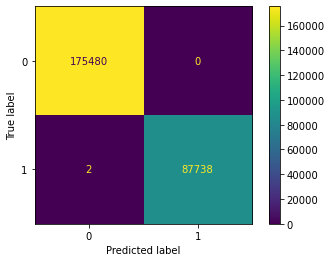

In [101]:
plot_confusion_matrix(rfc1_under,X_train_under,y_train_under);

# Test Accuracy under sampling

In [102]:
rfc1_under.score(X_test,y_test)

0.9075735177190513

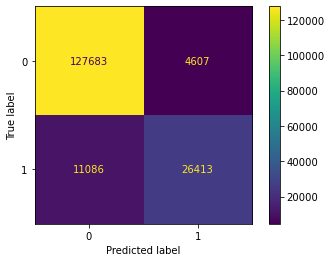

In [103]:
plot_confusion_matrix(rfc1_under,X_test,y_test)

In [104]:
ytest_predict_under=rfc1_under.predict(X_test)

In [105]:
print(classification_report(y_test,ytest_predict_under))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94    132290
           1       0.85      0.70      0.77     37499

    accuracy                           0.91    169789
   macro avg       0.89      0.83      0.86    169789
weighted avg       0.90      0.91      0.90    169789



Best Model approcah : Random forest with F1 score ~77 % 